### Comparative Sequence Analysis of Covid19, MERS,SARS and EBOLA
+ Compare their DNA sequence and Protein (Amino Acid) sequence
- GC Content
- Freq of Each Amino Acids
+ Find similarity between them
    - Alignment
    - hamming distance

+ 3D structure of each


#### Datasource
+ Latest Sequence: https://www.ncbi.nlm.nih.gov/genbank/sars-cov-2-seqs/
+ Wuhan-Hu-1: https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta
+ Covid19: https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta
+ SARS:https://www.ncbi.nlm.nih.gov/nuccore/NC_004718.3?report=fasta
+ MERS:https://www.ncbi.nlm.nih.gov/nuccore/NC_019843.3?report=fasta
+ EBOLA : https://www.ncbi.nlm.nih.gov/nuccore/NC_002549.1?report=fasta


### PDB files
+ Covid19 : https://www.rcsb.org/3d-view/6LU7
+ SARS: https://www.rcsb.org/structure/5XES
+ MERS:
+ EBOLA:https://www.rcsb.org/structure/6HS4

In [29]:
# Load Pkgs
from Bio.Seq import Seq

In [30]:
# Create our sequence 
seq1 = Seq('ACTCGA')
seq2 = Seq('AC')

#### GC Contents In DNA
+ GC-content (or guanine-cytosine content) is the percentage of nitrogenous bases in a DNA or RNA molecule 
that are either guanine (G) or cytosine (C)

#### Usefulness
+ In polymerase chain reaction (PCR) experiments, the GC-content of short oligonucleotides known as primers is often used to predict their annealing temperature to the template DNA. 
+ A higher GC-content level indicates a relatively higher melting temperature.
+ DNA with low GC-content is less stable than DNA with high GC-content

In [31]:
from Bio.SeqUtils import GC

In [32]:
# Method 1 using GC
GC(seq1)

50.0

In [33]:
# Method 2 using custom fxn
def gc_content(seq):
    result =  float(seq.count('G') + seq.count('C'))/len(seq) * 100
    return result

In [34]:
gc_content(seq1)

50.0

In [35]:
# Method 2 using custom fxn
def gc_content2(seq):
    gc =  [ N for N in seq if N in 'CG']
    result =  float(len(gc))/len(seq) * 100
    return result

In [36]:
gc_content2(seq1)

50.0

#### Alignment Types
+ Global alignment: finds the best concordance/agreement betwenn all characters in two sequences
+ Local Alignment: finds just the subsequences that align the best

In [37]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [38]:
alignments = pairwise2.align.globalxx(seq1,seq2)

In [39]:
print(alignments)

[('ACTCGA', 'A--C--', 2.0, 0, 6), ('ACTCGA', 'AC----', 2.0, 0, 6)]


In [40]:
# To See it well
print(format_alignment(*alignments[0]))

ACTCGA
|  |  
A--C--
  Score=2



In [41]:
# To See second part
print(format_alignment(*alignments[1]))

ACTCGA
||    
AC----
  Score=2



In [42]:
# To see all alignment together using a loop
for a in alignments:
    print(format_alignment(*a))

ACTCGA
|  |  
A--C--
  Score=2

ACTCGA
||    
AC----
  Score=2



In [43]:
# Get only the score for one alignments
alignments2 = pairwise2.align.globalxx(seq1,seq2,one_alignment_only=True,score_only=True)

In [44]:
# Only 2 places
alignments2

2.0

#### Check for similarity or percentage of similarity
+ fraction of nucleotides that is the same/ total number of nucleotides * 100%


In [48]:
alignments2/len(seq1)*100

33.33333333333333

#### Hamming distance: shows how many places 2 strings differ
+ Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. 
+ In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the othe
+ It is used for error detection or error correction
+ It is used to quantify the similarity of DNA sequences,
+ For checking the edit distance
 - edit distance is a way of quantifying how dissimilar two strings (e.g., words) are to one another by counting the minimum number of operations required to transform one string into the other. 
 - eg Levenshtein distance


In [45]:
def hamming_distance(lhs,rhs):
    return len([(x,y) for x,y in zip(lhs,rhs) if x != y])

In [46]:
hamming_distance('ACTTA','ACCTA')

1

In [49]:
hamming_distance(seq1,seq1[::-1])

4

### Dot Plot
+ A dot plot is a graphical method that allows the comparison of two biological sequences 
and identify regions of close similarity between them.
+ Simplest method - put a dot wherever
sequences are identical 
+ Dot plots compare two sequences by organizing one sequence on the x-axis, and another on the y-axis, of a plot. 
+ When the residues of both sequences match at the same location on the plot, a dot is drawn at the corresponding position

#### usefulness
+ Dot plots can also be used to visually inspect sequences for 
  - direct or inverted repeats
  - regions with low sequence complexity.
  - Similar regions
  - Repeated sequences
  - Sequence rearrangements
  - RNA structures
  - Gene order

+ Link :https://stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python

In [50]:

def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

In [51]:
# Do A Dot plot
dotplot(seq1,seq2)

 |AC
----
A|■ 
C| ■
T|  
C| ■
G|  
A|■ 


In [55]:
#  Identical proteins will obviously have a diagonal line in the center of the matrix. 
dotplot(Seq('ACCTAG'),Seq('ACCTAG'))

 |ACCTAG
--------
A|■   ■ 
C| ■■   
C| ■■   
T|   ■  
A|■   ■ 
G|     ■


In [56]:
# Load Data Viz Pkgs
import numpy as np
import matplotlib.pyplot as plt

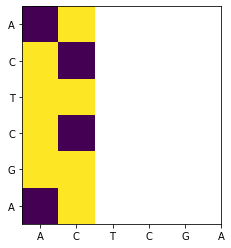

In [57]:
# Add Some fancyness to it
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

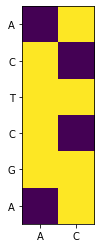

In [58]:
# Plot 
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

In [59]:
# Convert to Fxn
def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

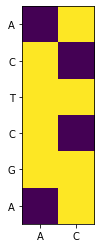

In [60]:
dotplotx(seq1,seq2)

#### Comparative Analysis of Covid,SARS,MERS,Ebola
+ Covid19(SARS-CoV2) is a novel coronavirus identified as the cause of coronavirus disease 2019 (COVID-19) that began in Wuhan, China in late 2019 and spread worldwide.
+ MERS(MERS-CoV) was identified in 2012 as the cause of Middle East respiratory syndrome (MERS).
+ SARS(SARS-CoV) was identified in 2002 as the cause of an outbreak of severe acute respiratory syndrome (SARS).

In [61]:
# Working with Sequences using fasta files
from Bio import SeqIO

In [62]:
covid = SeqIO.read("biodata/covid19_MN908947.3_sequence.fasta","fasta")
mers = SeqIO.read("biodata/mers_sequence.fasta","fasta")
sars = SeqIO.read("biodata/sars_sequence.fasta","fasta")
ebola = SeqIO.read("biodata/ebola_sequence.fasta","fasta")

In [63]:
covid

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet()), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [64]:
mers

SeqRecord(seq=Seq('GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTT...AAA', SingleLetterAlphabet()), id='NC_019843.3', name='NC_019843.3', description='NC_019843.3 Middle East respiratory syndrome coronavirus, complete genome', dbxrefs=[])

In [65]:
sars

SeqRecord(seq=Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA', SingleLetterAlphabet()), id='NC_004718.3', name='NC_004718.3', description='NC_004718.3 SARS coronavirus, complete genome', dbxrefs=[])

In [66]:
ebola

SeqRecord(seq=Seq('CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTA...CCA', SingleLetterAlphabet()), id='NC_002549.1', name='NC_002549.1', description='NC_002549.1 Zaire ebolavirus isolate Ebola virus/H.sapiens-tc/COD/1976/Yambuku-Mayinga, complete genome', dbxrefs=[])

In [67]:
# Convert or Get the sequences
covid_seq = covid.seq
mers_seq = mers.seq
sars_seq = sars.seq
ebola_seq = ebola.seq

In [68]:
# Check the length of each sequence
print("covid_seq ::",len(covid_seq))
print("mers_seq ::",len(mers_seq))
print("sars_seq ::",len(sars_seq))
print("ebola_seq ::",len(ebola_seq))

covid_seq :: 29903
mers_seq :: 30119
sars_seq :: 29751
ebola_seq :: 18959


In [69]:
# Check for the GC Content/ Which of them is more heat stable
from Bio.SeqUtils import GC

In [70]:
# Check the length of each sequence
print("GC content of covid_seq ::",GC(covid_seq))
print("GC content of mers_seq ::",GC(mers_seq))
print("GC content of sars_seq ::",GC(sars_seq))
print("GC content of ebola_seq ::",GC(ebola_seq))

GC content of covid_seq :: 37.97277865097148
GC content of mers_seq :: 41.23642883229855
GC content of sars_seq :: 40.7616550704178
GC content of ebola_seq :: 41.07284139458832


#### Narative
Mers is the most stable with a GC of 41.2 followed by Ebola

In [71]:
covid_protein = covid_seq.translate()
mers_protein = mers_seq.translate()
sars_protein = sars_seq.translate()
ebola_protein = ebola_seq.translate()

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [72]:
print("covid_protein ::",len(covid_protein))
print("mers_protein ::",len(mers_protein))
print("sars_protein ::",len(sars_protein))
print("ebola_protein ::",len(ebola_protein))

covid_protein :: 9967
mers_protein :: 10039
sars_protein :: 9917
ebola_protein :: 6319


#### Check for the Count of Amino Acids
+ ProtParam.ProteinAnalysis
+ Counter from collections

In [74]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [78]:
# Method 1
covid_analysed = ProteinAnalysis(str(covid_protein))
mers_analysed = ProteinAnalysis(str(mers_protein))
sars_analysed = ProteinAnalysis(str(sars_protein))
ebola_analysed = ProteinAnalysis(str(ebola_protein))

In [79]:
# Check for the Frequence of AA
covid_analysed.count_amino_acids()

{'A': 375,
 'C': 635,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 332,
 'I': 436,
 'K': 413,
 'L': 886,
 'M': 117,
 'N': 472,
 'P': 292,
 'Q': 325,
 'R': 558,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

In [80]:
# Method 2
# What the freq of Amino Acids
from collections import Counter

In [81]:
# Most common amino acid in Covid
covid_freq = Counter(covid_protein)
mers_freq = Counter(mers_protein)
sars_freq = Counter(sars_protein)
ebola_freq = Counter(ebola_protein)

In [82]:
covid_freq

Counter({'I': 436,
         'K': 413,
         'G': 394,
         'L': 886,
         'Y': 505,
         'P': 292,
         'R': 558,
         '*': 774,
         'Q': 325,
         'T': 679,
         'N': 472,
         'S': 810,
         'C': 635,
         'V': 548,
         'F': 593,
         'A': 375,
         'H': 332,
         'D': 290,
         'E': 270,
         'W': 263,
         'M': 117})

In [83]:
# Most common amino acid in Covid
Counter(covid_protein).most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [84]:
# Most common amino acid in mers
Counter(mers_protein).most_common(10)

[('L', 1711),
 ('S', 852),
 ('*', 689),
 ('V', 651),
 ('I', 565),
 ('T', 564),
 ('R', 520),
 ('C', 506),
 ('F', 453),
 ('A', 418)]

In [85]:
# Most common amino acid in sars
Counter(sars_protein).most_common(10)

[('L', 1368),
 ('S', 737),
 ('T', 689),
 ('V', 683),
 ('A', 575),
 ('I', 566),
 ('K', 503),
 ('G', 438),
 ('F', 437),
 ('N', 418)]

In [86]:
# Most common amino acid in ebola
Counter(ebola_protein).most_common(10)

[('L', 662),
 ('S', 623),
 ('R', 437),
 ('T', 384),
 ('I', 371),
 ('K', 344),
 ('Q', 330),
 ('N', 294),
 ('P', 288),
 ('A', 280)]

<BarContainer object of 21 artists>

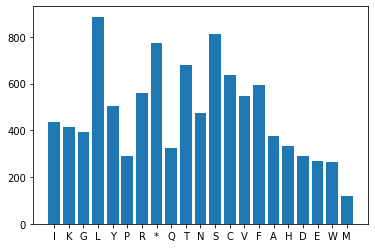

In [87]:
# Plot the Amino Acids
plt.bar(covid_freq.keys(), covid_freq.values())

<BarContainer object of 21 artists>

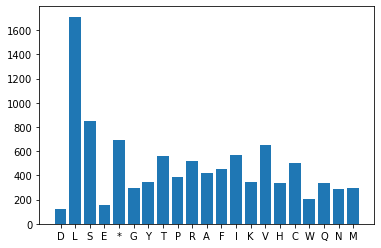

In [88]:
# plot of amino acids
plt.bar(mers_freq.keys(), mers_freq.values())

<BarContainer object of 21 artists>

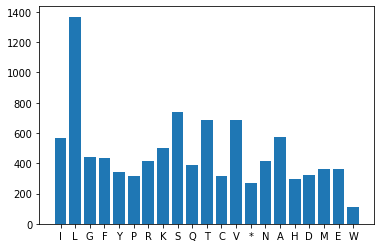

In [89]:
# plot of amino acids
plt.bar(sars_freq.keys(), sars_freq.values())

<BarContainer object of 21 artists>

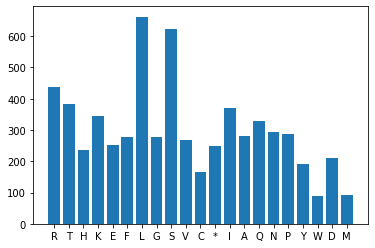

In [90]:
# plot of amino acids
plt.bar(ebola_freq.keys(), ebola_freq.values())

#### Check for the molecular weights
+ Need to remove stop codons * to get the molecular weights


In [94]:
# Method 1
# print("Molecular weights:: covid_analysed ::",covid_analysed.molecular_weight())
# print("Molecular weights:: mers_analysed  ::",mers_analysed.molecular_weight())
# print("Molecular weights:: sars_analysed  ::",sars_analysed.molecular_weight())
# print("Molecular weights:: ebola_analysed  ::",ebola_analysed.molecular_weight())

#### Dot Plot 

In [96]:
# Compare Covid and Mers
dotplot(covid_seq[0:10],mers_seq[0:10])

 |GATTTAAGTG
------------
A| ■   ■■   
T|  ■■■   ■ 
T|  ■■■   ■ 
A| ■   ■■   
A| ■   ■■   
A| ■   ■■   
G|■      ■ ■
G|■      ■ ■
T|  ■■■   ■ 
T|  ■■■   ■ 


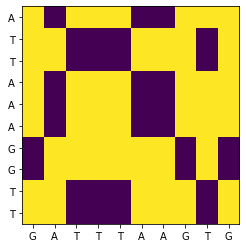

In [97]:
# Compare Covid and Mers
dotplotx(covid_seq[0:10],mers_seq[0:10])

In [98]:
# Compare Covid and sars
dotplot(covid_seq[0:10],sars_seq[0:10])

 |ATATTAGGTT
------------
A|■ ■  ■    
T| ■ ■■   ■■
T| ■ ■■   ■■
A|■ ■  ■    
A|■ ■  ■    
A|■ ■  ■    
G|      ■■  
G|      ■■  
T| ■ ■■   ■■
T| ■ ■■   ■■


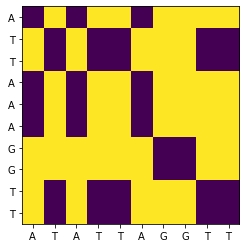

In [99]:
# Compare Covid and sars
dotplotx(covid_seq[0:10],sars_seq[0:10])

In [100]:
# Pairwise alignment for the first 100 nucleotide
cov_n_sars = pairwise2.align.globalxx(covid_seq[0:100],sars_seq[0:100],one_alignment_only=True,score_only=True)

In [101]:
cov_n_sars

89.0

In [103]:
# Percentage of similarity between them
cov_n_sars/len(covid_seq[0:100]) * 100

89.0

In [104]:
# Pairwise alignment for the first 100 nucleotide
cov_n_mers = pairwise2.align.globalxx(covid_seq[0:100],mers_seq[0:100],one_alignment_only=True,score_only=True)

In [105]:
cov_n_mers

71.0

In [106]:
# Percentage of similarity between them
cov_n_mers/len(covid_seq[0:100]) * 100

71.0

In [107]:
# Pairwise alignment for the first 100 nucleotide
cov_n_ebola = pairwise2.align.globalxx(covid_seq[0:100],ebola_seq[0:100],one_alignment_only=True,score_only=True)

In [108]:
cov_n_ebola

58.0

#### Narative
+ Covid19 and SARS have a 89% similarity.Both are of the same genus and belong to Sars_Cov
+ Covid and Ebola have a 58% similarity since they are totally from different family of virus


### 3D Structure

In [34]:
# 3D Structure
from Bio.PDB import PDBParser,MMCIFParser

In [36]:
parser = PDBParser()

In [37]:
covid_structure = parser.get_structure("6LU7", "3dData/covid19/6lu7.pdb")

/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2837.
  PDBConstructionWarning,


In [38]:
sars_structure = parser.get_structure("5xes", "3dData/sars/5xes.pdb")
mers_structure = parser.get_structure("6pxh", "3dData/mers/6pxh.pdb")
ebola_structure = parser.get_structure("6hs4", "3dData/ebola/6hs4.pdb")

/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25533.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25880.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 26125.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 26135.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26140.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26356.
  PDBC

In [39]:
len(covid_structure)

1

In [40]:
len(sars_structure)

20

In [41]:
len(ebola_structure)

1

In [46]:
import nglview as nv

In [47]:
view_covid =  nv.show_biopython(covid_structure)

In [48]:
view_covid

NGLWidget()

In [49]:
view_mers =  nv.show_biopython(mers_structure)

In [50]:
view_mers

NGLWidget()

In [51]:
view_sars =  nv.show_biopython(sars_structure)

In [52]:
view_sars

NGLWidget()

In [53]:
view_ebola =  nv.show_biopython(ebola_structure)

In [54]:
view_ebola

NGLWidget()

In [76]:
# Thanks For Your Time
# Jesus Saves @JCharisTech
# Jesse E.Agbe(JCharis)